<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Alanave28/blob/main/CursoIBM_2_Mod2_A00989308.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Alan Avelino Fernández Juárez - A00989308**

##**MÓDULO 2**

###**Preprocesamiento de datos en Python**

  También denomidado "Limpeiza de datos" es el proceso que convierte o mapea los datos para llegar a una forma previo a un análisis.



####**Data Frame Operation**

  Acceder a una columna

    * df["nombre_columna"] 

  Agregar valor a una columna

    * df["nombre_columna"] = df["nombre_columna"]+1

####**Identificación y Manejo de Datos Nulos**

Dato nulo o faltante en un DataFrame se representa como:

    * ?
    * N/A (NaN)
    * Zero (0)
    * Vacío

Cómo lidiar con este tipo de valores

    * Identifcar a quien recopiló los datos y lo complete.

    * Eliminar los datos en los que se encuentra este tipo de dato.
      -> Eliminar la variable
      -> Eliminar la entrada de datos (fila o columna)

    * Reemplazar loa datos.
      -> Reemplazar por un promedio (datapoint similar)
      -> Reemplazar por frecuencia
      -> Reemplazar basado en otras funciones

    * Dejar vaciíos los valores.


Eliminar los datos

    * Pandas
      -> df.dropna()
        - axis = 1 para columnas
        - axis = 0 para filas
        - inplace = True permite que la modificación se realice en el conjunto de datos directamente.

Reemplazar los datos

    * Pandas
      -> df.replace("valor_remplazar", "valor_nuevo")
        - valor promedio : mean = df["columna"].mean()
        - df["columna"].replace(np.nan, mean)
    

####**Formato de Datos**
  
Convertir los datos a un estándar común para realizar comparaciones significativas.

En la limpieza de datos el formateo de estos garantiza consistencia, comprensión, fácil uso y comparación de estos. 

Aplicar cálculos a una columna entera

    * df["columna"] = valor/df["columna"] || df["columna"]+1 || df["columna"]*valor

Renombrar nombre de columna

    * df.rename(columns = {"columna":"col_new"}, inplace=True)

Tipos de datos Incorrectos
    
    * Identificar
      -> df.dtypes()

    * Convertir
      -> df.astype()

    * Ejemplo
       -> df["col1"] = df["col1"].astype("int")
    

####**Normalización de Datos**
  
Se utiliza para dar consistencia a los datos facilitando el análisis futuros.

Técnicas para normalizar datos. 

  a) Escalado de carácterísticas simple

    * Divide cada valor por el valor máximo de la columna.

    * Hace que los valores se encuentren entre 0 y 1.

    * Ejem: df["col1"] = df["col1"] / df["col1"].max()

  b) Min - Max

    * Toma cada valor, le resta el valor mínimo de la columna y después lo divide por la diferencia del valor máximo y el valor mínimo de la columna.

    * Hace que los valores se encuentren entre 0 y 1.

    * Ejem: df["col1"] = (df["col1"] - df["col1"].min()) / (df["col1"].max() - df["col1"].min())

  c) Z-Score || Standar-Score

    * Toma cada valor, le resta Miu (promedio de la columna) y lo divide por sigma (desviación estándar de la columna).

    * Hace que los valores se encuentren entre -3 y 3, normalmente alrededor de 0.

    * Ejem: df["col1"] = (df["col1"] - df["col1"].mean()) / df["col1"].std()

####**Agrupación o Clasificación de Datos**

    * Tiene la posibilidad de mejorar la precisión de los modelos predictivos.

    * Se utiliza para hacer conjuntos de datos numéricos y así tener una mejor comprensión de la distribución de datos.

- Proceso para categorizar con Python

  * Con Numpy devolvemos una matriz de 4 valores espaciados sobre el intervalo especificado.
    * bins = np.linspace(min(df["col1"]), max(df["col1"]), 4)

  * Se crea una lista con el nombre de las categorías
    * group_names = ["Clase1", "Clase2", "Clase3"]

  * Se utiliza pandas para segmentar y clasificar los valores en contenedores.
    *  df["col_bin"] = pd.cut(df["col1"], bins, labels=group_names, include_lowest=True)

  * Se pueden utilizar histogramas para visualizar la distribución de las variables.
    

####**Variables Categóricas**

    * En la mayoría de los modelos estadísticos no se aceptan objetos o cadenas como entrada.
    
    * En entrenamiento solo toma números como entrada.

#####**Codificación one-hot**

- La forma de categorizar es crear columnas con el nombre de las cadenas y colocar 0's y 1's.

- Pandas - Convertir Variables Categóricas a Variables Numéricas
  
  * pd.get_dummies(df["col1"]) 
    

###**Laboratorio**


####**Identify and handle missing values**

In [19]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [20]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(filename, names = headers)

In [22]:
#Identify missing values
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [23]:
#Evaluating for Missing Data
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
#Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [25]:
#Calculate the mean value for the "normalized-losses" column
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [26]:
#Replace "NaN" with mean value in "normalized-losses" column
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [30]:
#Calculate the mean value for the "bore" column
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

df["bore"].replace(np.nan, avg_bore, inplace=True)

Average of bore: 3.3297512437810943


In [31]:
#Pregunta 1 : Based on the example above, replace NaN in "stroke" column with the mean value.
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

df["stroke"].replace(np.nan, avg_stroke, inplace = True)

Average of stroke: 3.2554228855721394


In [32]:
#Calculate and replace the mean value for the "horsepower" column
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


In [33]:
#Calculate and replace the mean value for "peak-rpm" column
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


In [34]:
#To see which values are present in a particular column, we can use the ".value_counts()" method:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [35]:
#The replacement procedure is very similar to what we have seen previously:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

df.dropna(subset=["price"], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

In [36]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


####**Correct data format**

In [37]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [38]:
#Convert data types to proper forma
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

####**Data Standardization**

In [39]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [40]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [41]:
#Pregunta 2 : According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".
df["highway-mpg"] = 235/df["highway-mpg"]

df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


####**Data Normalization**

In [42]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [43]:
#Pregunta 3 : According to the example above, normalize the column "height".
df['height'] = df['height']/df['height'].max() 

df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


####**Binning**

In [44]:
#Example of Binning Data In Pandas
df["horsepower"]=df["horsepower"].astype(int, copy=True)
df["horsepower"].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

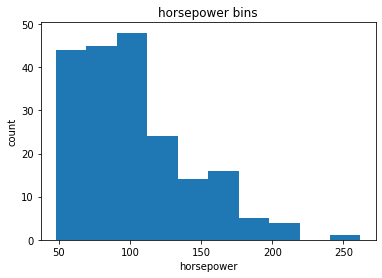

In [49]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [45]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [46]:
group_names = ['Low', 'Medium', 'High']

In [47]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [48]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

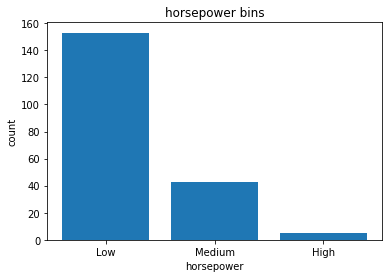

In [50]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

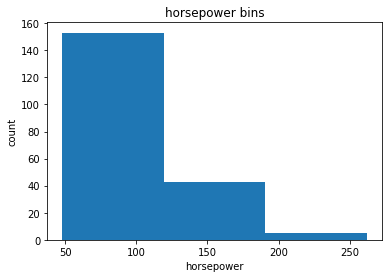

In [51]:
#Bins Visualization
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

####**Indicator Variable (or Dummy Variable)**

In [52]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [53]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [54]:
#Change the column names for clarity:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [55]:
#In the dataframe, column 'fuel-type' has values for 'gas' and 'diesel' as 0s and 1s now.
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [56]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [57]:
#Pregunta 4 : Similar to before, create an indicator variable for the column "aspiration"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

dummy_variable_2.head()


,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [58]:
#Pregunta 5 : Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.
df = pd.concat([df, dummy_variable_2], axis=1)

df.drop('aspiration', axis = 1, inplace=True)

In [59]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


###**Examen**

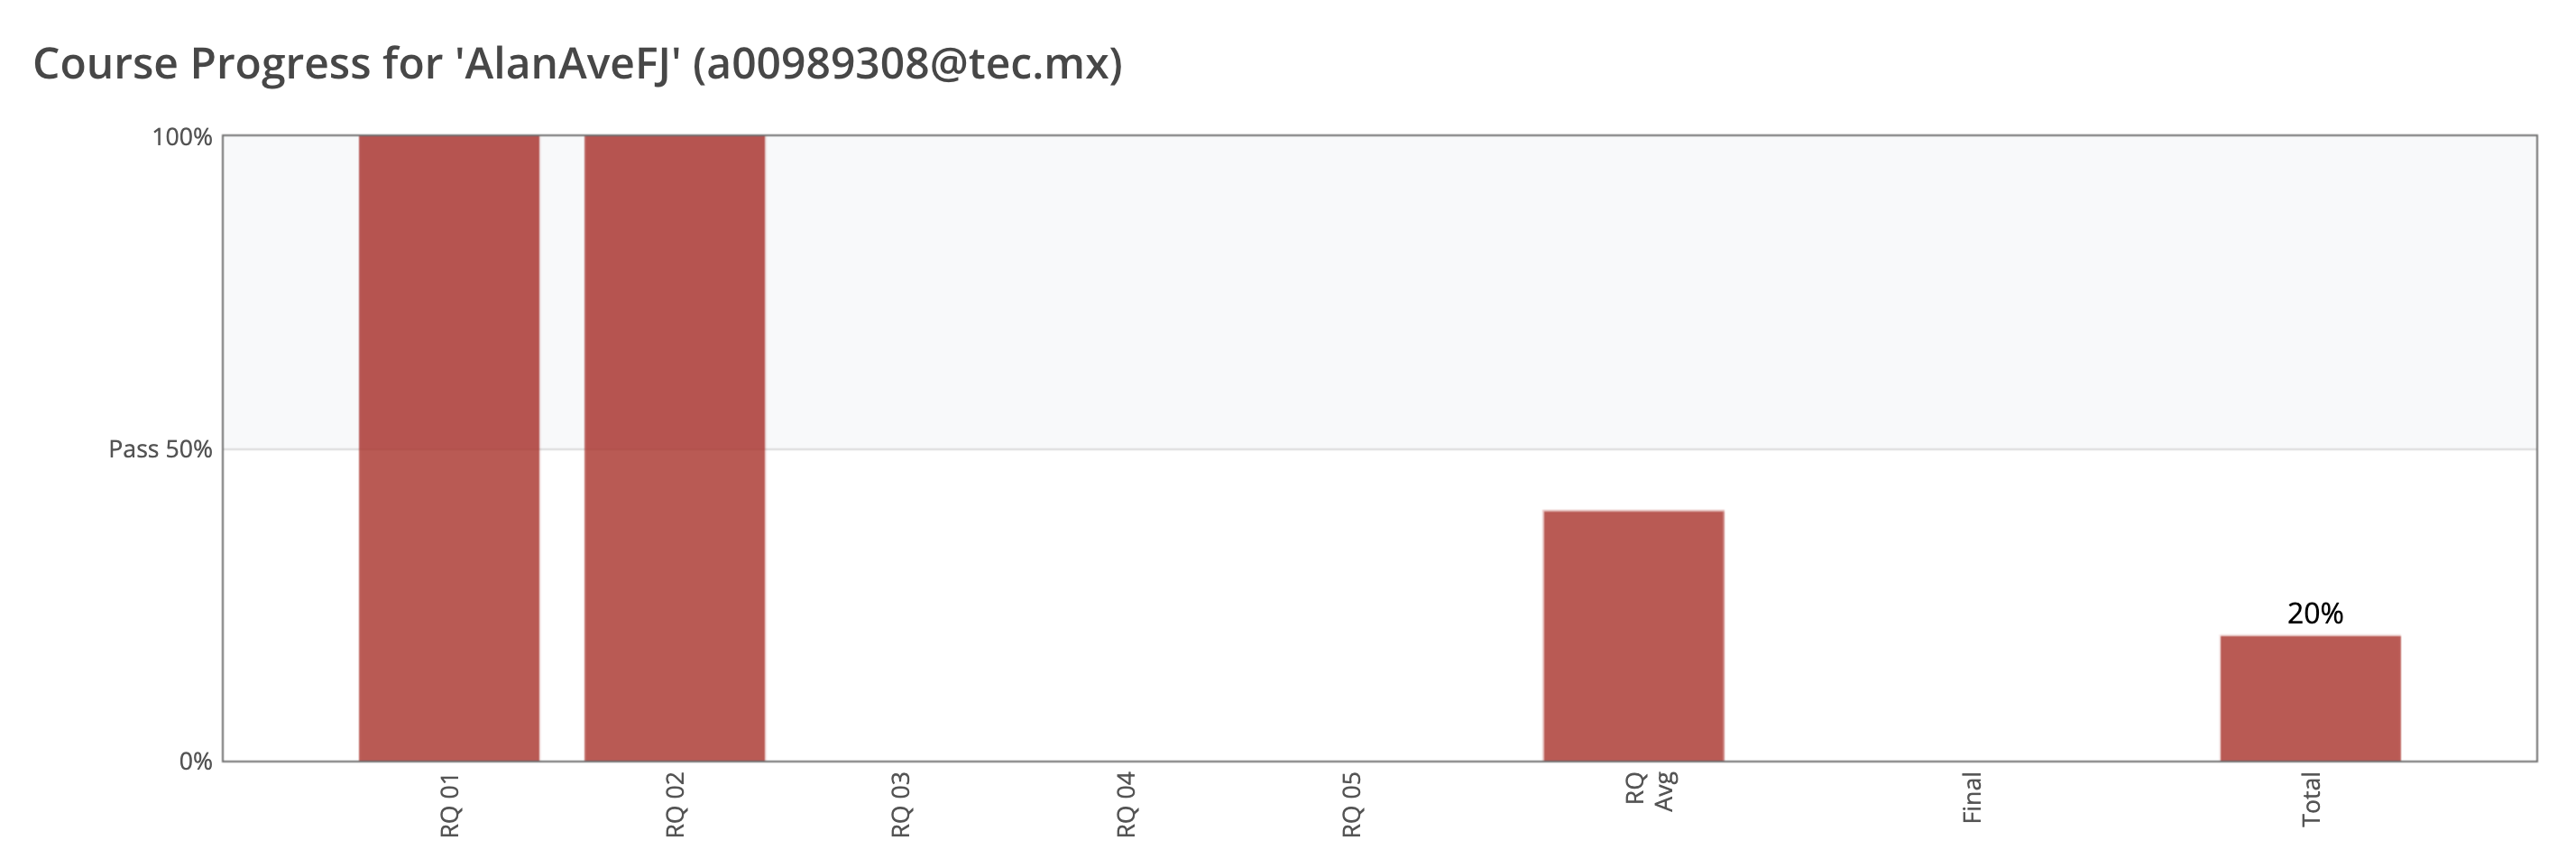

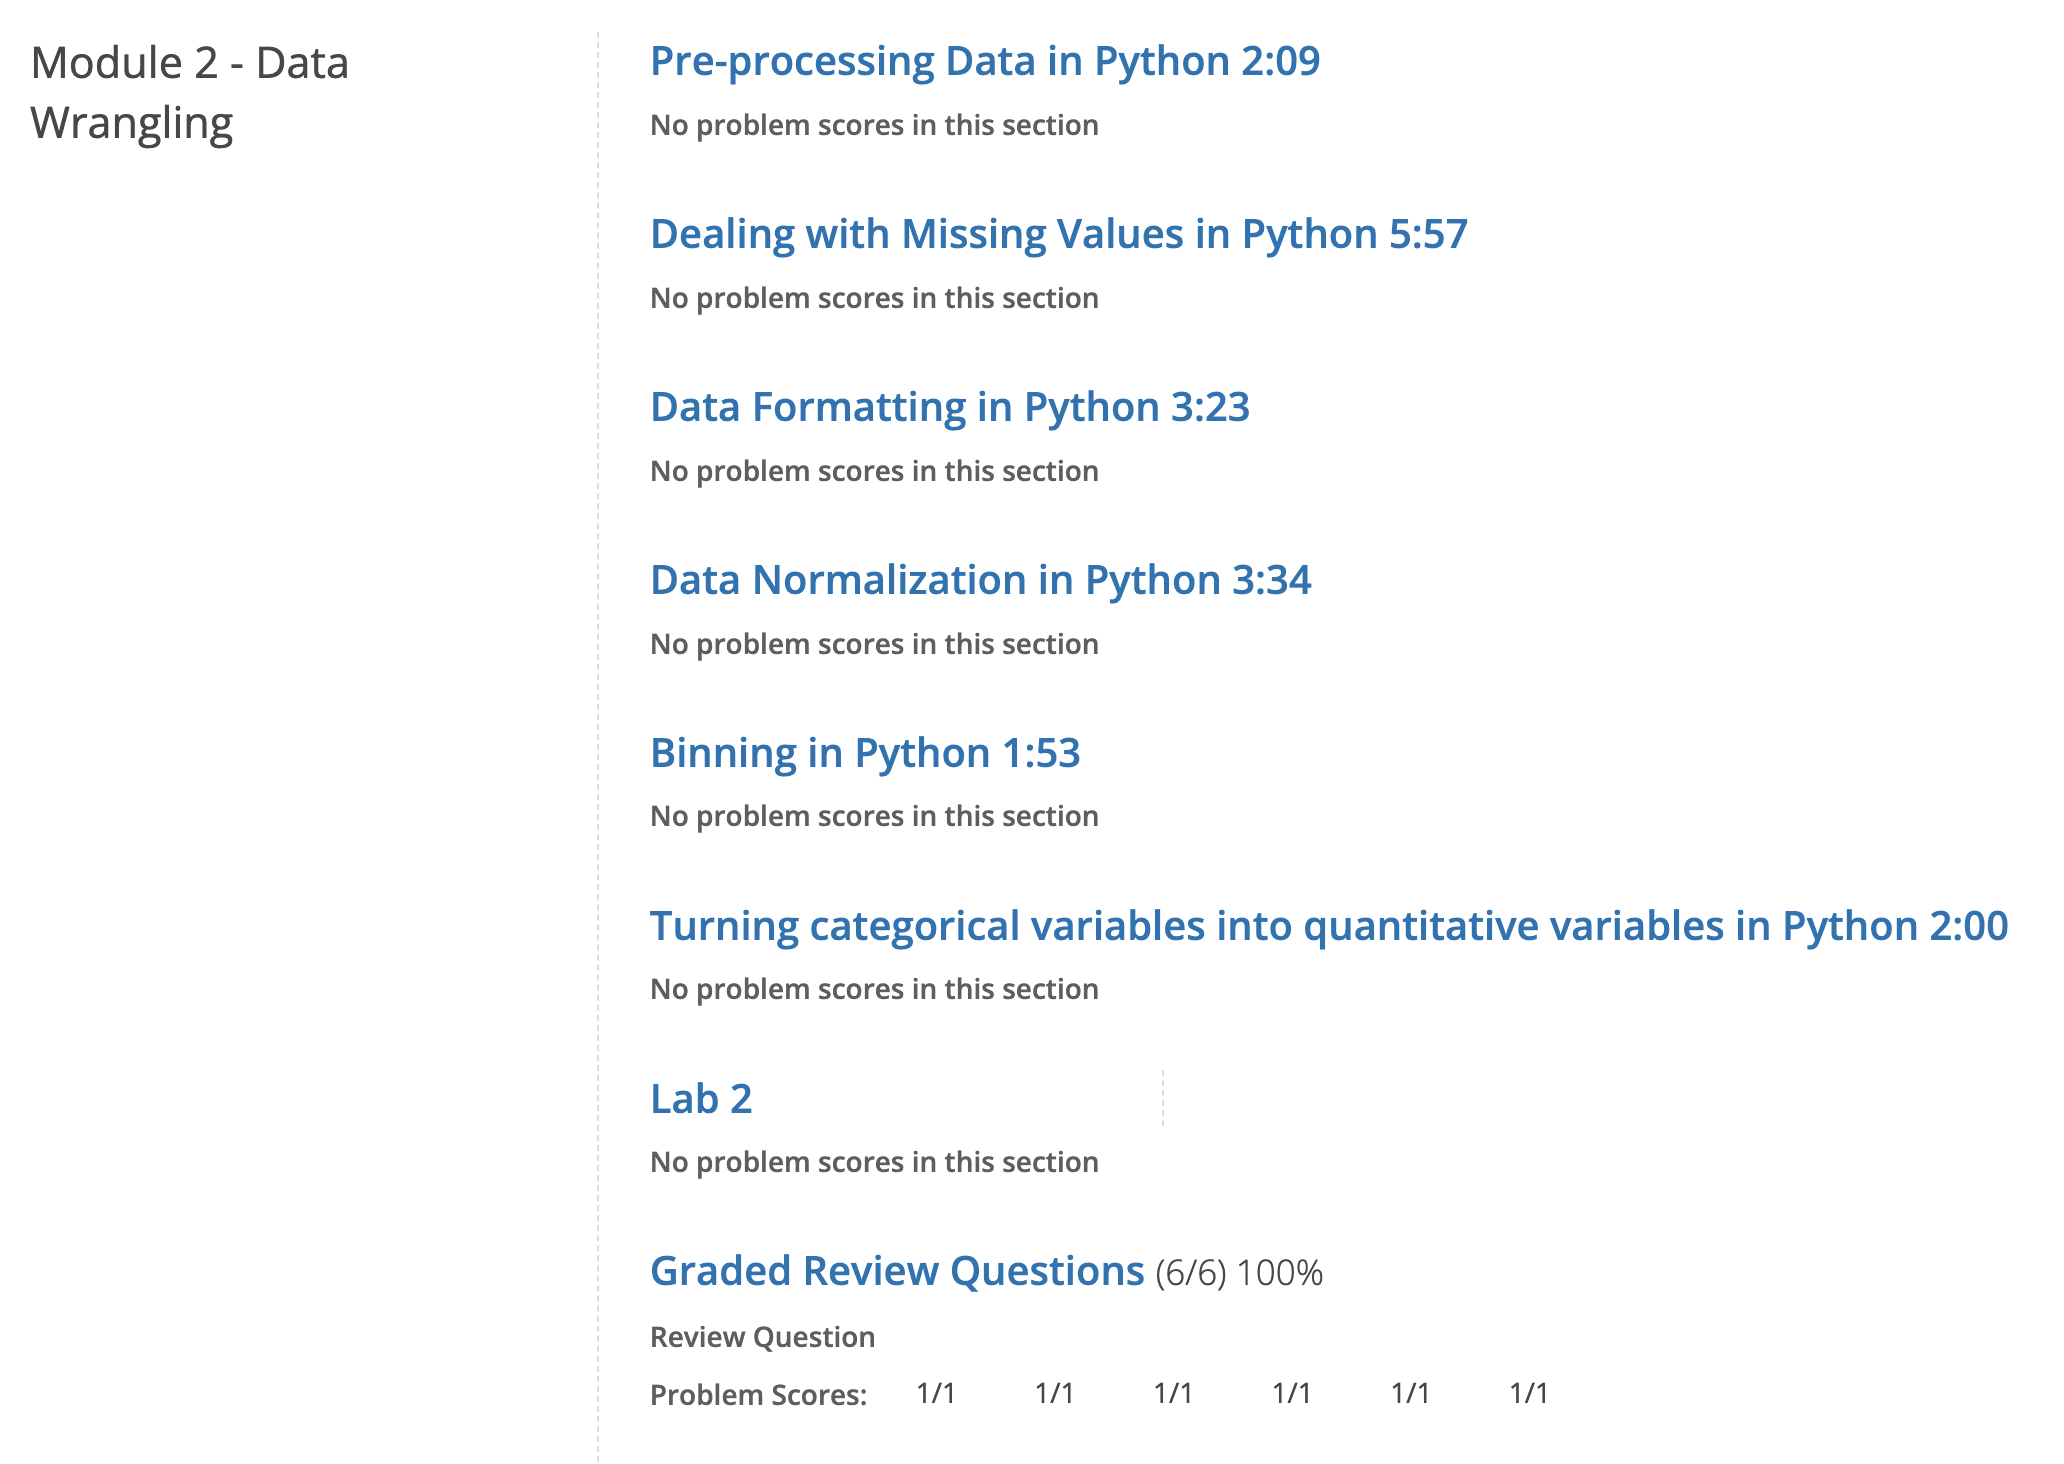